## Introdução à Ciência de Dados - Universidade de São Paulo

# Questionário 3 - Teoria da Decisão Bayesiana

##### Prof. Francisco Rodrigues - Aluno: Gean Gobo da Cruz - N° USP: 13661979


### Pacotes

In [17]:
from sklearn.preprocessing import LabelEncoder # Usamos para o pré-processamento dos dados
from sklearn.model_selection import train_test_split # Separar treino e teste
from sklearn.preprocessing import StandardScaler # Ajustando a escala dos dados
from sklearn.naive_bayes import GaussianNB # Modelo Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay # Métricas de avaliação
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # Modelo QDA
from sklearn.neighbors import KernelDensity # Estimador de densidade
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Datasets

In [28]:
df_vertebral = pd.read_csv('../data/vertebralcolumn-2C.csv')
df_red = pd.read_csv('../data/winequality-red.csv')


### 1. Considerando a base de dados vertebralcolumn-2C.csv, encontre o melhorclassificador dentre os métodos classificador Bayesiano, classificador Bayesino não-paramétrico e Naive Bayes.


In [27]:
df_vertebral.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Separar Variáveis Independentes (Features) e Variável Alvo (Target)

In [5]:
# 'X' conterá as features (todas as colunas, exceto a última)
X = df_vertebral.iloc[:, :-1]

# 'y' conterá a variável alvo (a última coluna, 'class')
y = df_vertebral.iloc[:, -1]

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  

Target (y):
0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: class, dtype: object


Label Encoding - Condificando a variável alvo, pois ml não trabalha com texto e sim 0 ou 1. 

In [10]:
# Aplicando a codificacão na variável y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
# O LabelEncoder geralmente ordena alfabeticamente, então 'Abnormal' se torna 0 e 'Normal' se torna 1.
print(f"Classes originais: {le.classes_}")
print(f"Primeiros 5 valores de y antes da codificação: {y.head().values}")
print(f"Primeiros 5 valores de y após a codificação: {y_encoded[:5]}")

Classes originais: ['Abnormal' 'Normal']
Primeiros 5 valores de y antes da codificação: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal']
Primeiros 5 valores de y após a codificação: [0 0 0 0 0]


Dividir os Dados em Conjuntos de Treino e Teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 248 amostras
Tamanho do conjunto de teste: 62 amostras


Feature Scaling - Padronização dos dados: Temos que tomar cuidado com a sensibildiade a escalas muito diferentes de features. 

In [ ]:
# Cria o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Apenas transforma os dados de teste (usando o ajuste feito com os dados de treino)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para visualização (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Dados de treino padronizados (primeiras 5 linhas):")
print(X_train_scaled.head())

Dados de treino padronizados (primeiras 5 linhas):
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.751299     0.358793               0.265541      0.704144   
1          0.730159    -0.797490               0.565371      1.514558   
2          1.656737     0.512492               2.035762      1.754627   
3          1.098472     3.089342               0.000090     -0.828224   
4          0.668654    -0.019898              -0.021432      0.872397   

   pelvic_radius  degree_spondylolisthesis  
0       0.212944                  1.215560  
1      -1.383068                  0.009995  
2      -1.251299                 -0.596465  
3      -0.492699                  1.042556  
4       0.137725                  0.140048  


Modelo 1: Naive Bayes (Gaussiano)

In [18]:
# 1. Instanciar e treinar o modelo
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_gnb = gnb.predict(X_test_scaled)

Modelo 2: Classificador Bayesiano "Puro" (Análise Discriminante Quadrática - QDA)

In [19]:
# 1. Instanciar e treinar o modelo
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_qda = qda.predict(X_test_scaled)

/Users/geangobo/Projetos/Introduction-to-Data-Science-USP/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/geangobo/Projetos/Introduction-to-Data-Science-USP/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Modelo 3: Classificador Bayesiano Não-Paramétrico (com Kernel Density Estimation)

In [20]:
# Classe personalizada para o classificador não-paramétrico
class KDEClassifier:
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.models = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            # Treina um modelo KDE para cada classe
            X_c = X[y == c]
            self.models[c] = KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(X_c)
            # Calcula a probabilidade a priori de cada classe
            self.priors[c] = len(X_c) / len(X)
        return self

    def predict(self, X):
        # Calcula a verossimilhança (likelihood) de cada ponto para cada classe
        log_likelihoods = np.array([model.score_samples(X) for _, model in self.models.items()]).T
        # Aplica a regra de Bayes (em escala logarítmica)
        log_posteriors = log_likelihoods + np.log(list(self.priors.values()))
        # A classe com a maior probabilidade a posteriori é a predição
        return self.classes[np.argmax(log_posteriors, axis=1)]

# 1. Instanciar e treinar o modelo não-paramétrico
kde_clf = KDEClassifier(bandwidth=0.5) # O bandwidth é um hiperparâmetro que pode ser ajustado
kde_clf.fit(X_train_scaled, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_kde = kde_clf.predict(X_test_scaled)

Avaliacão e comparação dos modelos da questão 1. 

In [22]:
target_names = ['Abnormal', 'Normal']

#  Resultados para Naive Bayes
print("\n--- Classificador Naive Bayes (Gaussiano) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_gnb):.4f}")
print(classification_report(y_test, y_pred_gnb, target_names=target_names))

# Resultados para QDA
print("\n--- Classificador Bayesiano (QDA) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_qda):.4f}")
print(classification_report(y_test, y_pred_qda, target_names=target_names))

# Resultados para Não-Paramétrico (KDE)
print("\n--- Classificador Bayesiano Não-Paramétrico (KDE) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_kde):.4f}")
print(classification_report(y_test, y_pred_kde, target_names=target_names))


--- Classificador Naive Bayes (Gaussiano) ---
Acurácia: 0.8065
              precision    recall  f1-score   support

    Abnormal       0.97      0.74      0.84        42
      Normal       0.63      0.95      0.76        20

    accuracy                           0.81        62
   macro avg       0.80      0.84      0.80        62
weighted avg       0.86      0.81      0.81        62


--- Classificador Bayesiano (QDA) ---
Acurácia: 0.8548
              precision    recall  f1-score   support

    Abnormal       1.00      0.79      0.88        42
      Normal       0.69      1.00      0.82        20

    accuracy                           0.85        62
   macro avg       0.84      0.89      0.85        62
weighted avg       0.90      0.85      0.86        62


--- Classificador Bayesiano Não-Paramétrico (KDE) ---
Acurácia: 0.8387
              precision    recall  f1-score   support

    Abnormal       0.92      0.83      0.88        42
      Normal       0.71      0.85      0.77  

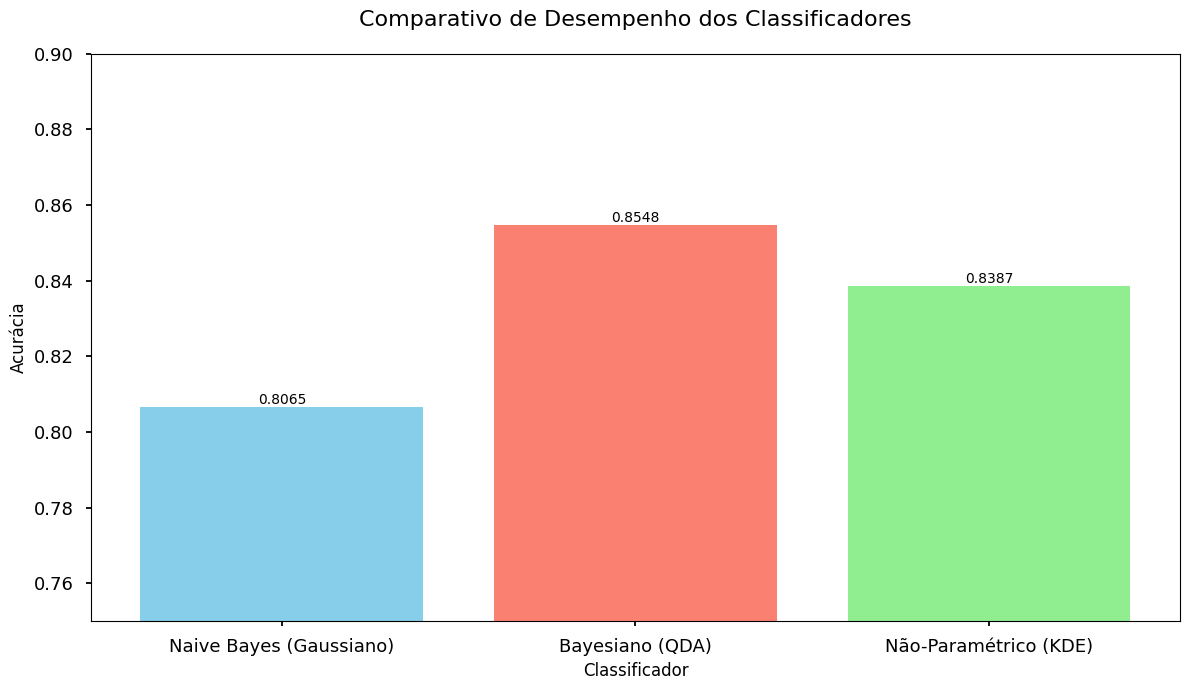

In [23]:
# 1. Calcular as acurácias
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_qda = accuracy_score(y_test, y_pred_qda)
acc_kde = accuracy_score(y_test, y_pred_kde)

# 2. Preparar os dados para o gráfico
nomes_classificadores = ['Naive Bayes (Gaussiano)', 'Bayesiano (QDA)', 'Não-Paramétrico (KDE)']
acuracias = [acc_gnb, acc_qda, acc_kde]

# 3. Criar o gráfico
plt.style.use('seaborn-v0_8-talk')
plt.figure(figsize=(12, 7))

bars = plt.bar(nomes_classificadores, acuracias, color=['skyblue', 'salmon', 'lightgreen'])

# Adicionar o valor exato em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center') # va: vertical alignment

# Customizar o gráfico
plt.title('Comparativo de Desempenho dos Classificadores', fontsize=16, pad=20)
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Classificador', fontsize=12)
plt.ylim(0.75, 0.9) # Ajusta o limite do eixo Y para destacar a diferença
plt.tight_layout()
plt.show()

### 2. Considerando a base de dados “winequality-red”, encontre o valor do hiperparâmetro h que oferece a maior acurácia no Bayesino não-paramétrico.


In [29]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
